In [1]:
import sqlite3
import csv
import pandas as pd
import numpy as np
import os
from numpy import median
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [4]:
suicide = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/who_suicide_statistics.csv')

In [6]:
suicide['age'].values

array(['15-24 years', '25-34 years', '35-54 years', ..., '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [7]:
suicide.dropna(inplace=True)
suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
sex            36060 non-null object
age            36060 non-null object
suicides_no    36060 non-null float64
population     36060 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
suicide.describe(include = 'all')

,country,year,sex,age,suicides_no,population
count,36060,36060.000000,36060,36060,36060.000000,3.606000e+04
unique,118,NaN,2,6,NaN,NaN
top,Hungary,NaN,male,55-74 years,NaN,NaN
freq,456,NaN,18030,6010,NaN,NaN
mean,NaN,1998.935441,NaN,NaN,221.809956,1.699996e+06
std,NaN,10.163883,NaN,NaN,855.449442,3.697811e+06
min,NaN,1979.000000,NaN,NaN,0.000000,2.590000e+02
25%,NaN,1991.000000,NaN,NaN,2.000000,8.056600e+04
50%,NaN,2000.000000,NaN,NaN,21.000000,3.757650e+05
75%,NaN,2008.000000,NaN,NaN,116.000000,1.344900e+06


In [77]:
suicide.head(20)

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
29,Albania,1987,female,75+ years,1.0,35600.0
30,Albania,1987,male,15-24 years,21.0,312900.0
31,Albania,1987,male,25-34 years,9.0,274300.0
32,Albania,1987,male,35-54 years,16.0,308000.0
33,Albania,1987,male,5-14 years,0.0,338200.0


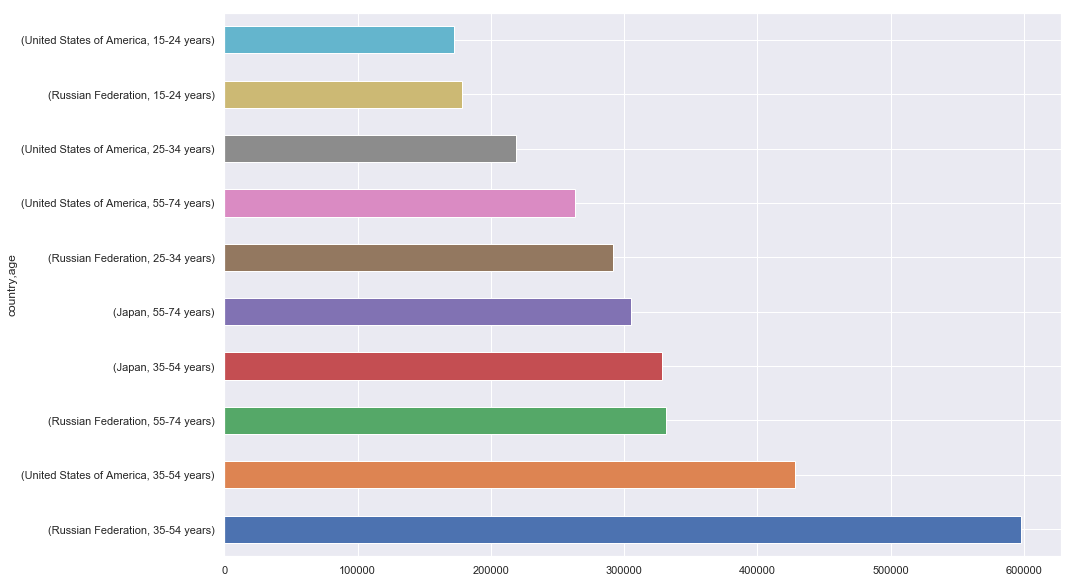

In [21]:
suicide.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind = 'barh')

In [9]:
suicide['age'] = suicide.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

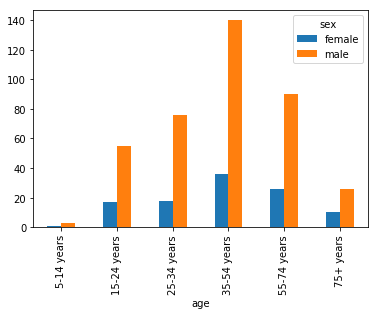

In [10]:
suicide.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='median').plot(kind='bar')

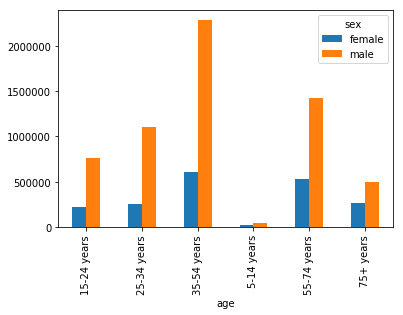

In [7]:
suicide.groupby(by=['age','sex'])['suicides_no'].sum().unstack().plot(kind='bar', stacked = False)

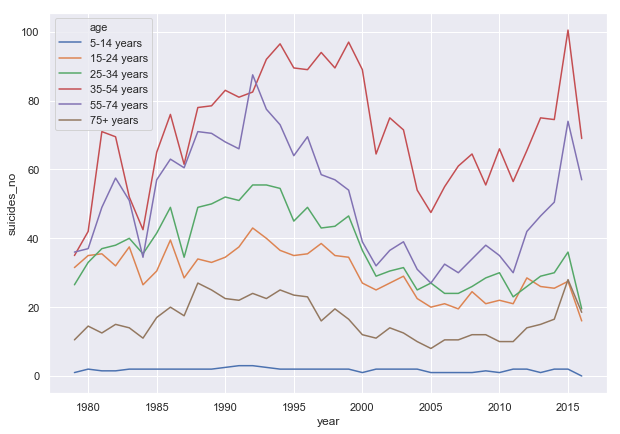

In [35]:
df = suicide.groupby(['year','age']).suicides_no.median().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot('year','suicides_no',hue='age',data=df)
plt.savefig('lineplog.png')

In [54]:
pd.crosstab(index=suicide.country, columns=suicide.year, margins=True)

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
country,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,0,0,0,0,0,0,12,12,...,12,12,12,0,0,0,0,0,0,264
Antigua and Barbuda,0,0,0,0,12,0,12,12,12,12,...,12,12,0,0,12,12,12,12,0,336
Argentina,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,0,444
Armenia,0,0,12,12,0,0,12,12,12,12,...,12,12,12,12,12,12,12,12,12,384
Aruba,0,0,0,0,0,0,0,0,12,0,...,12,12,12,12,12,12,12,12,0,240
Australia,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,0,432
Austria,0,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,444
Azerbaijan,0,0,12,12,0,0,12,12,12,12,...,0,0,0,0,0,0,0,0,0,276
Bahamas,0,12,12,0,12,12,12,0,12,0,...,12,12,12,12,12,12,0,0,0,324


In [53]:
pd.crosstab(index=suicide.country, columns=suicide.year, values=suicide.suicides_no, aggfunc ='sum')

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,63.0,...,124.0,160.0,0.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN
Argentina,1802.0,1972.0,2197.0,1965.0,1834.0,1873.0,1988.0,2284.0,2286.0,2354.0,...,2946.0,3059.0,2884.0,2943.0,2912.0,3248.0,2987.0,3231.0,3073.0,NaN
Armenia,NaN,NaN,92.0,70.0,NaN,NaN,74.0,61.0,81.0,61.0,...,71.0,63.0,53.0,73.0,67.0,79.0,67.0,58.0,74.0,67.0
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,8.0,4.0,4.0,7.0,9.0,3.0,2.0,5.0,9.0,NaN
Australia,1675.0,1606.0,1671.0,1766.0,1697.0,1753.0,1861.0,2044.0,2164.0,2172.0,...,2229.0,2341.0,2337.0,2420.0,2392.0,2580.0,2608.0,2891.0,3027.0,NaN
Austria,NaN,1932.0,2032.0,2070.0,2041.0,2028.0,2091.0,2139.0,2069.0,1851.0,...,1285.0,1267.0,1278.0,1264.0,1288.0,1276.0,1291.0,1314.0,1251.0,1204.0
Azerbaijan,NaN,NaN,287.0,239.0,NaN,NaN,244.0,235.0,254.0,232.0,...,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,NaN,1.0,1.0,NaN,5.0,7.0,1.0,NaN,3.0,NaN,...,5.0,4.0,6.0,10.0,4.0,5.0,5.0,NaN,NaN,NaN


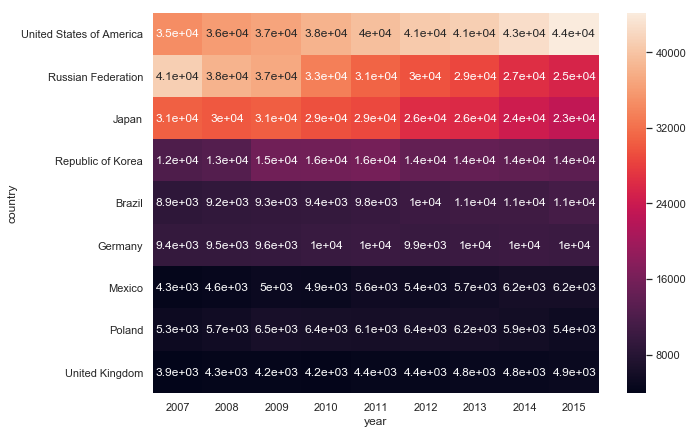

In [44]:
p = pd.crosstab(index=suicide.country, columns=suicide.year, values=suicide.suicides_no, aggfunc ='sum')
sns.heatmap(p.loc[:,2007:2015].sort_values(by = 2015, ascending=False).dropna().head(9), annot=True)

In [45]:
pp = pd.crosstab(index=suicide.country,columns=suicide.year,values=suicide.population,aggfunc='sum')
p/pp*10000

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269412,0.227906,...,0.447598,0.580329,0.000000,0.350874,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.120292,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.108827,NaN
Argentina,0.721204,0.798167,0.878948,0.749057,0.687999,0.702185,0.733828,0.838337,0.828279,0.831567,...,0.811224,0.832754,0.776145,0.783162,0.765999,0.844914,0.768674,0.822628,0.774063,NaN
Armenia,NaN,NaN,0.332286,0.250573,NaN,NaN,0.258191,0.210825,0.277141,0.208049,...,0.259568,0.206870,0.197048,0.272772,0.250902,0.280709,0.238378,0.206919,0.264727,0.240651
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.843757,0.421879,0.421963,0.736796,0.942527,0.311802,0.205952,0.510267,0.911743,NaN
Australia,1.261352,1.190944,1.211888,1.259306,1.194263,1.219495,1.277940,1.380167,1.438208,1.418486,...,1.129498,1.163501,1.138372,1.160808,1.145489,1.214752,1.207397,1.318431,1.361013,NaN
Austria,NaN,2.731978,2.848412,2.902606,2.869488,2.853425,2.940881,3.004573,2.901821,2.590837,...,1.627144,1.598686,1.608175,1.586262,1.610977,1.588789,1.597848,1.614020,1.522011,1.447253
Azerbaijan,NaN,NaN,0.518762,0.425683,NaN,NaN,0.416944,0.396404,0.422355,0.379935,...,0.069435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,NaN,0.055432,0.055218,NaN,0.263852,0.349476,0.049092,NaN,0.135808,NaN,...,0.158736,0.124437,0.183031,0.299519,0.118209,0.145536,0.143283,NaN,NaN,NaN


In [52]:
pivot_table = suicide.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum'])
pivot_table

sum                             \
                                   suicides_no                              
year                                      1979     1980     1981     1982   
country                                                                     
Albania                                    NaN      NaN      NaN      NaN   
Antigua and Barbuda                        NaN      NaN      NaN      NaN   
Argentina                               1802.0   1972.0   2197.0   1965.0   
Armenia                                    NaN      NaN     92.0     70.0   
Aruba                                      NaN      NaN      NaN      NaN   
Australia                               1675.0   1606.0   1671.0   1766.0   
Austria                                    NaN   1932.0   2032.0   2070.0   
Azerbaijan                                 NaN      NaN    287.0    239.0   
Bahamas                                    NaN      1.0      1.0      NaN   
Bahrain                                    NaN      NaN      NaN      NaN   
Barbados                                   2.0      3.0      7.0      2.0   
Belarus                                    NaN      NaN   2388.0   2616.0   
Belgium                                 2114.0   2178.0   2157.0   2153.0   
Belize                                     NaN      2.0      NaN      0.0   
Bermuda                                    NaN      3.0      NaN      NaN   
Bosnia and Herzegovina                     NaN      NaN      NaN      NaN   
Brazil                                  3459.0   3864.0   4029.0   3897.0   
Brunei Darussalam                          NaN      NaN      NaN      NaN   
Bulgaria                                   NaN   1206.0   1209.0   1360.0   
Cabo Verde                                 NaN      NaN      NaN      NaN   
Canada                                  3355.0   3355.0   3400.0   3517.0   
Cayman Islands                             NaN      NaN      NaN      NaN   
Chile                                      NaN    539.0    650.0    646.0   
Colombia                                   NaN      NaN      NaN      NaN   
Costa Rica                                 NaN    122.0     97.0     90.0   
Croatia                                    NaN      NaN      NaN      NaN   
Cuba                                       NaN      NaN      NaN      NaN   
Cyprus                                     NaN      NaN      NaN      NaN   
Czech Republic                             NaN      NaN      NaN      NaN   
Denmark                                    NaN      NaN      NaN      NaN   
...                                        ...      ...      ...      ...   
Russian Federation                         NaN  47877.0  47557.0  48663.0   
Saint Kitts and Nevis                      NaN      NaN      NaN      NaN   
Saint Lucia                                1.0      3.0      1.0      NaN   
Saint Vincent and Grenadines               NaN      NaN      NaN      0.0   
San Marino                                 NaN      NaN      NaN      NaN   
Sao Tome and Principe                      NaN      NaN      NaN      NaN   
Serbia                                     NaN      NaN      NaN      NaN   
Seychelles                                 NaN      NaN      NaN      NaN   
Singapore                                246.0    269.0    190.0    238.0   
Slovakia                                   NaN      NaN      NaN      NaN   
Slovenia                                   NaN      NaN      NaN      NaN   
South Africa                               NaN      NaN      NaN      NaN   
Spain                                      NaN   1652.0   1718.0   1851.0   
Sri Lanka                                  NaN   4269.0   4401.0   5076.0   
Suriname                                  49.0     58.0     52.0     64.0   
Sweden                                     NaN      NaN      NaN      NaN   
Switzerland                                NaN      NaN      NaN      NaN   
TFYR Macedonia                         

In [192]:
pivot_table_pct_change = pivot_table.pct_change(axis='columns')
pivot_table_pct_change.columns = pivot_table.pct_change(axis='columns').columns.droplevel().droplevel()
pivot_table_pct_change

year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.136986,...,inf,0.290323,-1.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,inf,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.000000
Argentina,NaN,0.094340,0.114097,-0.105599,-0.066667,0.021265,0.061399,0.148893,0.000876,0.029746,...,-0.052124,0.038357,-0.057208,0.020458,-0.010533,0.115385,-0.080357,0.081687,-0.048901,0.000000
Armenia,NaN,NaN,NaN,-0.239130,0.000000,0.000000,0.057143,-0.175676,0.327869,-0.246914,...,-0.089744,-0.112676,-0.158730,0.377358,-0.082192,0.179104,-0.151899,-0.134328,0.275862,-0.094595
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.111111,-0.500000,0.000000,0.750000,0.285714,-0.666667,-0.333333,1.500000,0.800000,0.000000
Australia,NaN,-0.041194,0.040473,0.056852,-0.039071,0.032999,0.061609,0.098334,0.058708,0.003697,...,0.052905,0.050247,-0.001709,0.035516,-0.011570,0.078595,0.010853,0.108512,0.047043,0.000000
Austria,NaN,NaN,0.051760,0.018701,-0.014010,-0.006369,0.031065,0.022956,-0.032726,-0.105365,...,-0.009252,-0.014008,0.008682,-0.010955,0.018987,-0.009317,0.011755,0.017816,-0.047945,-0.037570
Azerbaijan,NaN,NaN,NaN,-0.167247,0.000000,0.000000,0.020921,-0.036885,0.080851,-0.086614,...,-0.490741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bahamas,NaN,NaN,0.000000,0.000000,4.000000,0.400000,-0.857143,0.000000,2.000000,0.000000,...,1.500000,-0.200000,0.500000,0.666667,-0.600000,0.250000,0.000000,0.000000,0.000000,0.000000


In [87]:
bycountry = pivot_table.T.reset_index().set_index('year').drop('level_1', axis =1).drop('level_0', axis =1)

In [84]:
pivot_table_population = suicide.pivot_table(index='country',columns='year',values=['population'], aggfunc=['sum'])
population_data = pivot_table_population.T.reset_index()
population_data.set_index('year', inplace=True)
population_data
population_data.drop(population_data.columns[[0,1]],axis = 1, inplace = True)

country,level_0,level_1,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA)
year,,,,,,,,,,,,,,,,,,,,,
1979,sum,population,NaN,NaN,24986000.0,NaN,NaN,13279400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,52495800.0,208504000.0,NaN,NaN,12204000.0,NaN
1980,sum,population,NaN,NaN,24706600.0,NaN,NaN,13485100.0,7071800.0,NaN,...,NaN,NaN,NaN,NaN,52533800.0,210745000.0,2634100.0,NaN,12730000.0,85800.0
1981,sum,population,NaN,NaN,24995800.0,2768700.0,NaN,13788400.0,7133800.0,5532400.0,...,NaN,2488900.0,46545800.0,NaN,52859492.0,212406000.0,2662000.0,13870700.0,13127600.0,NaN
1982,sum,population,NaN,NaN,26233000.0,2793600.0,NaN,14023600.0,7131523.0,5614500.0,...,NaN,2551400.0,46723100.0,NaN,52795142.0,214162000.0,2680200.0,14221100.0,13530300.0,NaN
1983,sum,population,NaN,64691.0,26657000.0,NaN,NaN,14209600.0,7112766.0,NaN,...,NaN,NaN,NaN,NaN,52769713.0,216423000.0,2696500.0,NaN,13924200.0,NaN
1984,sum,population,NaN,NaN,26673900.0,NaN,NaN,14374800.0,7107249.0,NaN,...,NaN,NaN,NaN,NaN,52864838.0,218635000.0,2716900.0,NaN,NaN,NaN
1985,sum,population,NaN,62574.0,27090800.0,2866100.0,NaN,14562500.0,7110115.0,5852100.0,...,NaN,2728200.0,47127600.0,NaN,53006535.0,220723000.0,2737400.0,15265500.0,14757400.0,NaN
1986,sum,population,NaN,61270.0,27244400.0,2893400.0,NaN,14809800.0,7119149.0,5928300.0,...,NaN,2792000.0,47243600.0,NaN,53119533.0,222953000.0,2757600.0,15632500.0,15161100.0,NaN
1987,sum,population,2709600.0,60261.0,27599400.0,2922700.0,55589.0,15046500.0,7130006.0,6013900.0,...,NaN,2859100.0,47374200.0,NaN,53239668.0,225148000.0,2778900.0,16011200.0,15569700.0,NaN


In [189]:
suicide_rate = bycountry/population_data*10000


<bound method NDFrame.head of country   Albania  Antigua and Barbuda  Argentina   Armenia     Aruba  \
year                                                                    
1979          NaN                  NaN   0.721204       NaN       NaN   
1980          NaN                  NaN   0.798167       NaN       NaN   
1981          NaN                  NaN   0.878948  0.332286       NaN   
1982          NaN                  NaN   0.749057  0.250573       NaN   
1983          NaN             0.000000   0.687999       NaN       NaN   
1984          NaN                  NaN   0.702185       NaN       NaN   
1985          NaN             0.000000   0.733828  0.258191       NaN   
1986          NaN             0.000000   0.838337  0.210825       NaN   
1987     0.269412             0.000000   0.828279  0.277141  0.000000   
1988     0.227906             0.000000   0.831567  0.208049       NaN   
1989     0.242589             0.000000   0.782872  0.265704       NaN   
1990          NaN    

In [170]:
suicide_rate_melt = suicide_rate.reset_index().melt(id_vars='year')
suicide_rate_melt.iloc[suicide_rate_melt.groupby('year').value.idxmax()]


,year,country,value
1786,1979,Hungary,4.850378
1787,1980,Hungary,4.861906
1788,1981,Hungary,4.915882
1789,1982,Hungary,4.681450
1790,1983,Hungary,4.921207
1791,1984,Hungary,4.906624
1792,1985,Hungary,4.727647
1793,1986,Hungary,4.820760
1794,1987,Hungary,4.789232
1795,1988,Hungary,4.388586


In [11]:
socio_economic = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/master.csv')
socio_economic.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
socio_economic.columns = ['country','year','sex','age','suicides_no','population','suicides_rate','country_year','HDI','gdp','gdp_per_capita','generation']

In [13]:
suicide_2015 = socio_economic[socio_economic['year']==2015].reset_index()
suicide_2015.head()

,index,country,year,sex,age,suicides_no,population,suicides_rate,country_year,HDI,gdp,gdp_per_capita,generation
0,576,Antigua and Barbuda,2015,female,55-74 years,1,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
1,577,Antigua and Barbuda,2015,female,15-24 years,0,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
2,578,Antigua and Barbuda,2015,female,25-34 years,0,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
3,579,Antigua and Barbuda,2015,female,35-54 years,0,15323,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
4,580,Antigua and Barbuda,2015,female,5-14 years,0,8239,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z


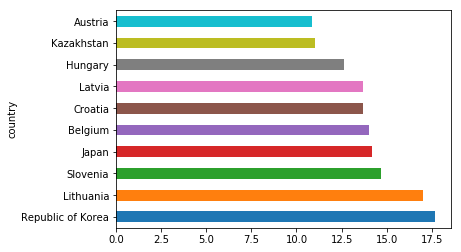

In [87]:
suicide_2015.groupby('country').suicides_rate.median().nlargest(10).plot(kind = 'barh')

In [ ]:
suicide_clean = suicide_2015.drop(['country_year','index','HDI','year'],axis=1)
suicide_clean.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/suicide_clean.csv', index=False)

In [72]:
suicide_clean.head(20)

,country,sex,age,suicides_no,population,suicides_rate,gdp,gdp_per_capita,generation
0,Antigua and Barbuda,female,55-74 years,1,6403,15.62,"1,364,863,037",14853,Boomers
1,Antigua and Barbuda,female,15-24 years,0,8561,0.00,"1,364,863,037",14853,Millenials
2,Antigua and Barbuda,female,25-34 years,0,7740,0.00,"1,364,863,037",14853,Millenials
3,Antigua and Barbuda,female,35-54 years,0,15323,0.00,"1,364,863,037",14853,Generation X
4,Antigua and Barbuda,female,5-14 years,0,8239,0.00,"1,364,863,037",14853,Generation Z
5,Antigua and Barbuda,female,75+ years,0,1724,0.00,"1,364,863,037",14853,Silent
6,Antigua and Barbuda,male,15-24 years,0,8331,0.00,"1,364,863,037",14853,Millenials
7,Antigua and Barbuda,male,25-34 years,0,7059,0.00,"1,364,863,037",14853,Millenials
8,Antigua and Barbuda,male,35-54 years,0,13370,0.00,"1,364,863,037",14853,Generation X
9,Antigua and Barbuda,male,5-14 years,0,8268,0.00,"1,364,863,037",14853,Generation Z


In [38]:
#pd.get_dummies(suicide_clean, columns = ['sex'])

In [69]:
len(suicide_clean['country'].unique())

62

In [68]:
len(suicide_clean['gdp_per_capita'].unique())

60

In [84]:
gdp_per_capita = suicide_clean[['country','gdp_per_capita']].groupby(['country'], as_index=False).mean().sort_values(by = 'country', ascending = True)
gdp_per_capita.head()

,country,gdp_per_capita
0,Antigua and Barbuda,14853
1,Argentina,14981
2,Armenia,3775
3,Australia,60656
4,Austria,46484


In [81]:
gdp_per_capita.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/gdp_per_capita.csv', index=False)

In [15]:
country_names, counts = np.unique(suicide_2015['country'], return_counts=True)
country_names

array(['Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Belgium', 'Belize', 'Brazil', 'Chile', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Hungary', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands',
       'Nicaragua', 'Norway', 'Panama', 'Poland', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', 'Russian Federation',
       'Saint Vincent and Grenadines', 'Serbia', 'Seychelles',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

In [227]:
country_melt = suicide_2015 [['country','suicides_rate']].groupby(suicide_2015['country']).sum().sort_values(by = 'suicides_rate', ascending = False)
country_names = country_melt.index.values

In [16]:
len(country_names)

62

In [17]:
socio_economic['suicides_rate'].corr(socio_economic['gdp_per_capita'])

0.0017851337973441698

In [18]:
world = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/world.csv')
world.head(30)

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua and Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [19]:
world['country'] = world['country'].str.rstrip()
world.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/world.csv', index=False)

In [20]:
happiness_2015 = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/world-happiness-report/2015.csv')
happiness_2015.info()

happiness_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [22]:
a = [];
for _ in happiness_2015['Country']:
    a.append(_ in ('Saint Vincent and Grenadines'))
np.unique(a, return_counts = True)

(array([False]), array([158]))

In [23]:
b = happiness_2015['Country'].isin(country_names)
unique, counts = np.unique(b, return_counts = True)
dict(zip(unique, counts))
happiness_clean = happiness_2015[happiness_2015['Country'].isin(country_names)]
happiness_clean.reset_index

happiness_clean.info();

happiness_clean.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/happiness_clean.csv', index=False)

<bound method DataFrame.reset_index of             Country                           Region  Happiness Rank  \
0       Switzerland                   Western Europe               1   
1           Iceland                   Western Europe               2   
2           Denmark                   Western Europe               3   
3            Norway                   Western Europe               4   
5           Finland                   Western Europe               6   
6       Netherlands                   Western Europe               7   
7            Sweden                   Western Europe               8   
9         Australia        Australia and New Zealand              10   
10           Israel  Middle East and Northern Africa              11   
12          Austria                   Western Europe              13   
13           Mexico      Latin America and Caribbean              14   
14    United States                    North America              15   
15           Brazil      

In [49]:
a = world['country'].isin(country_names)
unique, counts = np.unique(a, return_counts = True)
dict(zip(unique, counts))
countries_clean = world[world['country'].isin(country_names)]

countries_clean.reset_index()
countries_clean['climate'].fillna(countries_clean['climate'].dropna().median(), inplace=True)
countries_clean['deathrate'].fillna(countries_clean['deathrate'].dropna().median(), inplace=True)
countries_clean.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/countries_clean.csv', index=False)
countries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 7 to 215
Data columns (total 20 columns):
country             59 non-null object
region              59 non-null object
population          59 non-null int64
area                59 non-null int64
density             59 non-null float64
coastline           59 non-null float64
migration           59 non-null float64
infant_mortality    59 non-null float64
gdp                 59 non-null float64
literacy            59 non-null float64
phones              58 non-null float64
arable              59 non-null float64
crops               59 non-null float64
other               59 non-null float64
climate             59 non-null float64
birthrate           58 non-null float64
deathrate           59 non-null float64
agriculture         59 non-null float64
industry            59 non-null float64
service             59 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 9.7+ KB


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
